The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [46]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Load the dataset
df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [48]:
#Find the most common gender and birth country
top_gender = df['sex'].value_counts().index[0]
top_country = df['birth_country'].value_counts().index[0]

#Print
print(f"The most commonly awarded gender is {top_gender}.")
print(f"The most commonly awarded birth country is {top_country}.")

The most commonly awarded gender is Male.
The most commonly awarded birth country is United States of America.


# What is the most commonly awarded gender and birth country? 
### - The most commonly awarded gender is Male.
### - The most commonly awarded birth country is United States of America.

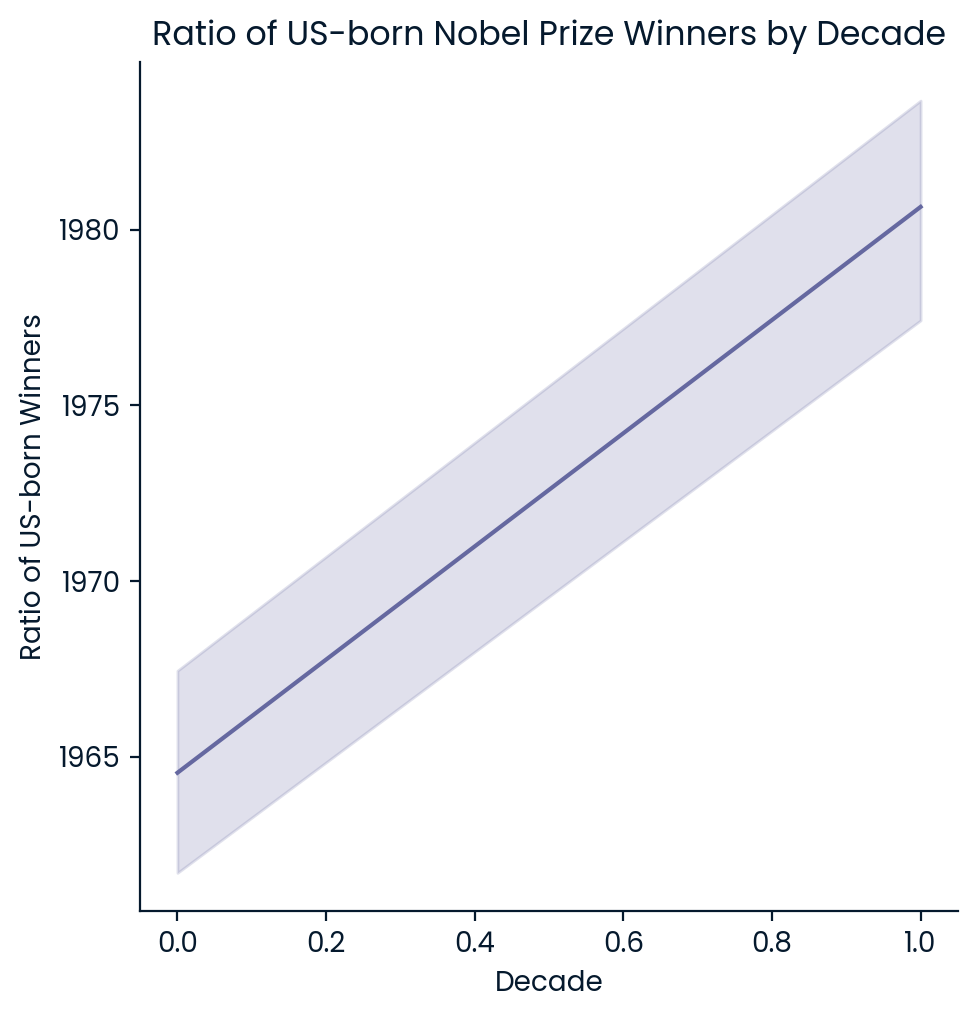

The decade with the highest ratio of US-born Nobel Prize winners is 2000.


In [49]:
#Create the US-born winners column
df['us_born'] = df['birth_country'] == 'United States of America'
#Create the decade column
df['decade'] = np.floor(df['year'] / 10).astype(int) * 10
#Finding the ratio
us_born_ratio = df.groupby('decade', as_index=False)['us_born'].mean()
#Create a relational line plot
sns.relplot(x = df['us_born'], y = df['decade'], data = df, kind = 'line')
plt.title("Ratio of US-born Nobel Prize Winners by Decade")
plt.xlabel("Decade")
plt.ylabel("Ratio of US-born Winners")
plt.show()

# Find the decade with the highest ratio of US-born winners
max_decade_usa = us_born_ratio.loc[us_born_ratio['us_born'].idxmax(), 'decade']
print(f"The decade with the highest ratio of US-born Nobel Prize winners is {max_decade_usa}.")

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
### The decade with the highest ratio of US-born Nobel Prize winners is 2000.

{2020: 'Literature'}


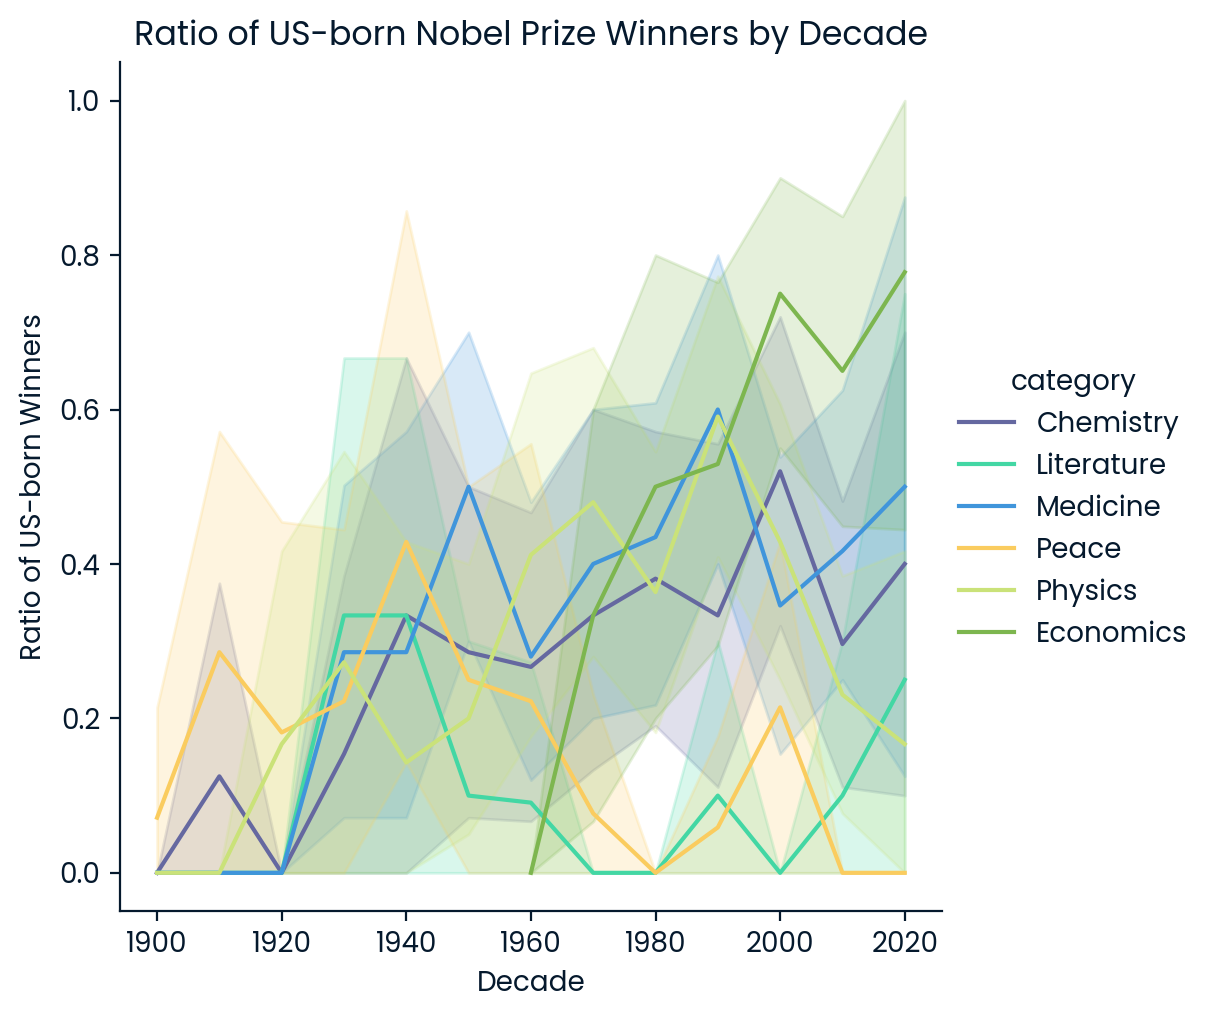

In [50]:
#Filtering for female winners
df['female_winners'] = df['sex'] == 'Female'

#Group by 'decade' and 'category', then calculate the mean of female winners
female_winner_ratio = df.groupby(['decade', 'category'], as_index=False)['female_winners'].mean()

#Find the row with the highest mean of female winners
max_female_winner_row = female_winner_ratio[female_winner_ratio['female_winners'] == female_winner_ratio['female_winners'].max()]

#Save the decade and category values
decade, category = max_female_winner_row[['decade', 'category']].iloc[0]

#Create the dictionary with 'decade' and 'category' pair
max_female_dict = {max_female_winner_row['decade'].values[0] : max_female_winner_row['category'].values[0]}

#Print the dictionary
print(max_female_dict)

#Create a relational line plot with multiple categories
sns.relplot(x='decade', y='us_born', data=df, kind='line', hue='category')
plt.title("Ratio of US-born Nobel Prize Winners by Decade")
plt.xlabel("Decade")
plt.ylabel("Ratio of US-born Winners")
plt.show()

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
### The decade and Nobel Prize category combination that had the highest proportion of female laureates were 2000, Literature.

In [51]:
#Filter for female winners
female_df = df[df['female_winners']]  # Make sure the parenthesis is closed here

#Find the minimum value in the female_df
min_year = female_df['year'].min()

#Find the row with the earliest year
first_female_winner = female_df[female_df['year'] == min_year]

#Extract the name and category as strings
first_woman_name = first_female_winner['full_name'].iloc[0]
first_woman_category = first_female_winner['category'].iloc[0]

#Print
print("First female winner:", first_woman_name)
print("Category:", first_woman_category)

First female winner: Marie Curie, née Sklodowska
Category: Physics


# Who was the first woman to receive a Nobel Prize, and in what category?
### It was Marie Curie, née Sklodowska in the category, "Physics".

In [52]:
#Count the values in a column
counts = df['full_name'].value_counts()

#Finding counts of two or more
persons_with_multiple_wins = counts[counts >= 2].index

#Store the names in a list called 'repeat_list'
repeat_list = list(persons_with_multiple_wins)

#Print the list
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


# Which individuals or organizations have won more than one Nobel Prize throughout the years?
### Comité international de la Croix Rouge (International Committee of the Red Cross)
### Linus Carl Pauling
### John Bardeen
### Frederick Sanger
### Marie Curie, née Sklodowska
### Office of the United Nations High Commissioner for Refugees (UNHCR)